In [12]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

Data Preview:
                                      thread_subject   username  \
0   English descriptions for Latvian municipalities        Sk!d   
1   English descriptions for Latvian municipalities   Ymblanter   
2   English descriptions for Latvian municipalities     Legoktm   
3               Fix calling of [[Template:archive]]     Kaganer   
4               Fix calling of [[Template:archive]]     Bináris   

                               page_name  
0  WikidataBotrequestsArchive201302.json  
1  WikidataBotrequestsArchive201302.json  
2  WikidataBotrequestsArchive201302.json  
3  WikidataBotrequestsArchive201302.json  
4  WikidataBotrequestsArchive201302.json  

Network Summary:
Number of Nodes (Editors): 552
Number of Edges (Social Connections): 2425


F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53097 (\N{HANGUL SYLLABLE KONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47336 (

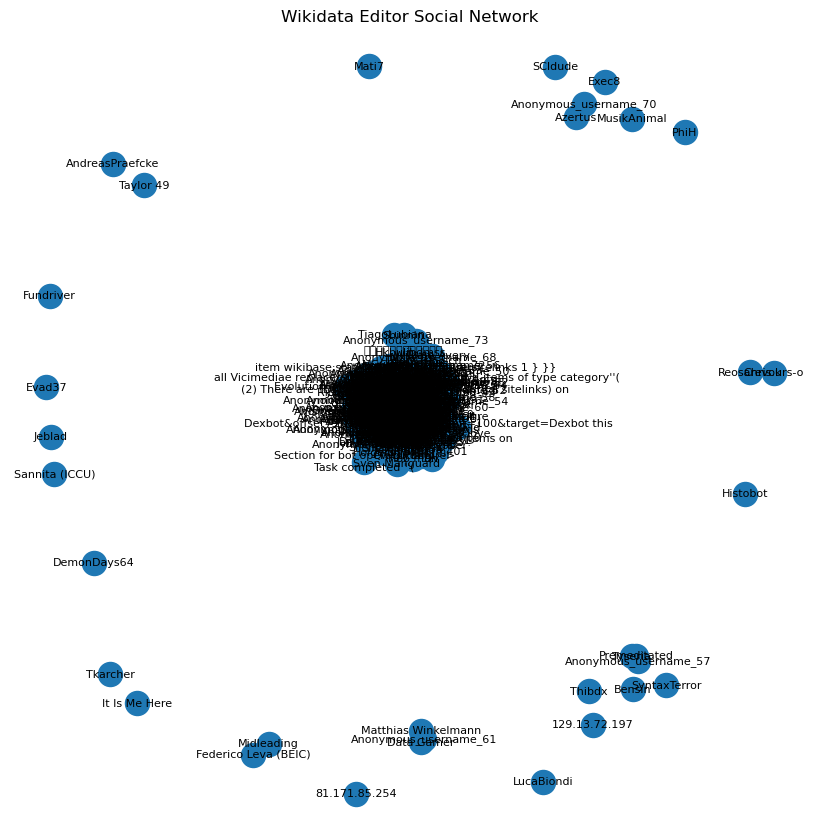

In [14]:
# 1. Load Data
# Ensure the file name and path are correct.
df = pd.read_csv('BOT_REQUESTS.csv')

# Display the first few rows to check the structure of the data.
print("Data Preview:")
print(df.head())

# We assume that the data contains the following columns: 'username', 'page', 'thread'
# Adjust the column names below if they differ in your CSV file.

# 2. Initialize the Graph
G = nx.Graph()

# Add all unique editors as nodes.
unique_users = df['username'].unique()
for user in unique_users:
    G.add_node(user)
    
# 3. Construct Edges
# Group the data by 'page' and 'thread'
grouped = df.groupby(['page_name', 'thread_subject'])
for (page, thread), group in grouped:
    # Get all unique editors in this group.
    users_in_group = group['username'].unique()
    # For every pair of editors in the group, create or update an edge.
    for user1, user2 in combinations(users_in_group, 2):
        if G.has_edge(user1, user2):
            # Update the existing edge: increment weight and add the current context.
            G[user1][user2]['weight'] += 1
            G[user1][user2]['contexts'].append((page, thread))
        else:
            # Create a new edge and initialize weight and context information.
            G.add_edge(user1, user2, weight=1, contexts=[(page, thread)])

# Output network summary information.
print("\nNetwork Summary:")
print("Number of Nodes (Editors):", G.number_of_nodes())
print("Number of Edges (Social Connections):", G.number_of_edges())

# 4. Visualize the Network (suitable for smaller networks)
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, seed=42)  # Use a fixed layout for reproducibility.
nx.draw(G, pos, with_labels=True, node_size=300, font_size=8)
plt.title("Wikidata Editor Social Network")
plt.show()
